**The data is about customer behavior in an e-commerce portal**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv("1 Cust_Spend_Data_New.csv")

In [3]:
data_df.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [5]:
data_df.shape

(829, 7)

In [6]:
data_df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [8]:
data_df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000


**We can see scaling is really important to proceed further**

In [9]:
data_df.duplicated().sum()

0

In [10]:
# 'Name','Cust_ID' are of no use while forming clusters
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [11]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X = StandardScaler()

In [14]:
scaled_df = X.fit_transform(cust_df)

In [15]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

**The dataframe has now become an array of dimendions 829x5**

**Let us see how to cluster data into 2**

In [16]:
k_means = KMeans(n_clusters = 2)

In [17]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [18]:
k_means.labels_ #'.labels_' tells which observation(all 829) belongs to which cluster

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [20]:
k_means.labels_.size

829

In [21]:
k_means.inertia_ # '.inertia_' returns WSS

2225.8180780994685

In [22]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

1074.382380298951

In [23]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

909.4495242917942

In [24]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


4145.0

In [25]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

784.5887748781101

In [26]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

697.7964308882451

In [27]:
wss =[]  # we will append various WSS values to this list

In [28]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [29]:
wss

[4145.0,
 2225.8180780994685,
 1074.382380298951,
 909.4453294086204,
 784.5887748781101,
 717.6723277475649,
 628.7760818567641,
 580.9502503458145,
 539.5903200507897,
 513.3114584109037]

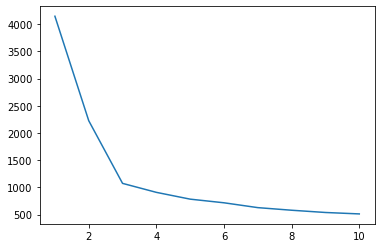

In [30]:
plt.plot(range(1,11), wss)

**We can see there are significant drops from 1 to 2 and from 2 to 3, but 3 onwards the plot gets steep. So, 3 is optimal no. of clusters**

In [36]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.labels_

array([2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0,
       0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1,
       1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0,

**This output can be attached to the original data as a column.**

In [37]:
labels = k_means.labels_

In [38]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans
0,1,Abraham,1123,28,1,16,14,2
1,2,Adela,9818,13,5,2,5,1
2,3,Adelina,9824,10,10,2,2,1
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,2


In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score
# 'silhouette_samples' calculates silhouette width for each row
# 'silhouette_score' calculates the silhouette score(average of silhouette widths for each row)

In [40]:
silhouette_score(scaled_df,labels)

0.5863370901372584

**As the 'silhouette score' is more than 0.5, we can say the clusters are well demarkated.**

In [41]:
sil_width = silhouette_samples(scaled_df,labels)

**Silhouette width can be attached to the original data as a column.**

In [42]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,2,0.656055
1,2,Adela,9818,13,5,2,5,1,0.512424
2,3,Adelina,9824,10,10,2,2,1,0.582380
3,4,Adrian,3097,23,2,8,9,0,0.375197
4,5,Adrianna,817,28,1,17,17,2,0.703167


In [43]:
silhouette_samples(scaled_df,labels).min()

0.04131038567750352

**The min. silhouette width is 0.04, indicating there are no incorrect mapping to any cluster in dataset.**

In [44]:
data_df.to_csv('km.csv')

In [47]:
df = pd.read_csv("km.csv")
df

,Unnamed: 0,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,0,1,Abraham,1123,28,1,16,14,2,0.656055
1,1,2,Adela,9818,13,5,2,5,1,0.512424
2,2,3,Adelina,9824,10,10,2,2,1,0.582380
3,3,4,Adrian,3097,23,2,8,9,0,0.375197
4,4,5,Adrianna,817,28,1,17,17,2,0.703167
...,...,...,...,...,...,...,...,...,...,...
824,824,825,Mccue,4639,17,4,7,10,0,0.690901
825,825,826,Dumas,4522,19,3,8,8,0,0.716207
826,826,827,Bock,4499,15,4,8,9,0,0.654906
827,827,828,Mcreynolds,4069,20,4,7,10,0,0.679728


In [53]:
df[df['Clus_kmeans']==0]['Avg_Mthly_Spend'].mean()
# the average of 'Avg_Mthly_Spend' is 4486.68 for cluster 0

4486.681506849315

In [54]:
df[df['Clus_kmeans']==1]['Avg_Mthly_Spend'].mean()
# the average of 'Avg_Mthly_Spend' is 8604.83 for cluster 1

8604.834532374101

In [56]:
df[df['Clus_kmeans']==2]['Avg_Mthly_Spend'].mean()
# the average of 'Avg_Mthly_Spend' is 1546.83 for cluster 2

1546.8301886792453

**This indicates cluster 0 is mediocre spending group, cluster 1 is premium spending group and cluster 2 is least spending group.**

**Above we did profiling for 'Avg_Mthly_Spend', similarily we can do for other columns too.**